In [2]:
#1
import json
import random 
from datetime import date, timedelta
import faker

In [3]:
#2 
fake = faker.Faker()

In [4]:
#3 instantiate Faker
usernames = set()
usernames_no = 1000

#populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

In [5]:
#4 loop for 1,000 elements
def get_random_name_and_gender():
    skew = .6 # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address()
        }
        users.append(json.dumps(user))
    return users

In [6]:
users = get_users(usernames)
users[:3] #preview

['{"username": "melaniehall", "name": "Spencer Mcgee", "gender": "M", "email": "lawsoncameron@hotmail.com", "age": 51, "address": "684 Bass Prairie\\nSouth Carlos, CT 00879"}',
 '{"username": "mary42", "name": "Susan Hawkins", "gender": "F", "email": "cbaker@stuart.com", "age": 25, "address": "806 Rebecca Motorway Apt. 734\\nSouth Michellehaven, OH 45984"}',
 '{"username": "lucasjonathan", "name": "Jennifer Hill", "gender": "F", "email": "joycekelly@horton.org", "age": 47, "address": "1209 Tracy Roads\\nNorth Michael, MA 30582"}']

In [7]:
#5 sensor records' date-time generation logic

#yyyy-mm-dd_time format
#remaining sensor inputs: Outside Temperature_Outside Humidity_Room Temperature_Room Humidity

def get_time():
    times = ['12:00am', '06:00am', '12:00pm', '06:00pm']
    return random.choice(times)

def get_date():
    start = date.fromisoformat('2015-01-01')
    days_since_start = date.today() - start #range of days from 01-01-2015 to today
    duration = random.randint(1,days_since_start.days)
    offset = random.randint(-365, 365)
    day_being_assessed = date.today() - timedelta(days=duration)
    end = start + timedelta(days=duration)
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    return _format_date(end)

def get_sensor_records_DATE_TIME():
    separator = '_'
    time_ = get_time()
    end = get_date()
    return separator.join(
        (time_, end))

In [8]:
#6 collect all pieces and return final sensor records' date-time
#sensor data
#Outside Temperature, Outside Humidity,  Room Temperature, Room Humidity

def get_sensor_records_DATA():
    time_date = get_sensor_records_DATE_TIME()
    outsidetemp = random.randint(70,96)
    outsidehum = random.randint(50,96)
    roomtemp = int(outsidetemp - random.randint(0,11))
    roomhum = int(outsidehum - random.randint(0,11))
    
    return {
        'time_yyyy-mm-dd': time_date,
        'outsidetemp': outsidetemp,
        'outsidehum': outsidehum,
        'roomtemp': roomtemp,
        'roomhum': roomhum
    }

In [9]:
#7 put data together
def get_data(users):
    data = []
    for user in users:
        readings = [get_sensor_records_DATA()
                    for _ in range(random.randint(0,1001))]
        data.append({'user': user, 'readings': readings})
    return data

In [10]:
#8 Cleaning the data
rough_data = get_data(users)
rough_data[:2] #preview

[{'user': '{"username": "melaniehall", "name": "Spencer Mcgee", "gender": "M", "email": "lawsoncameron@hotmail.com", "age": 51, "address": "684 Bass Prairie\\nSouth Carlos, CT 00879"}',
  'readings': [{'time_yyyy-mm-dd': '12:00am_20180501',
    'outsidetemp': 70,
    'outsidehum': 94,
    'roomtemp': 61,
    'roomhum': 84},
   {'time_yyyy-mm-dd': '12:00am_20171101',
    'outsidetemp': 91,
    'outsidehum': 52,
    'roomtemp': 88,
    'roomhum': 49},
   {'time_yyyy-mm-dd': '06:00pm_20171204',
    'outsidetemp': 77,
    'outsidehum': 66,
    'roomtemp': 73,
    'roomhum': 61},
   {'time_yyyy-mm-dd': '12:00pm_20160603',
    'outsidetemp': 79,
    'outsidehum': 73,
    'roomtemp': 75,
    'roomhum': 68},
   {'time_yyyy-mm-dd': '06:00am_20150522',
    'outsidetemp': 70,
    'outsidehum': 68,
    'roomtemp': 69,
    'roomhum': 63},
   {'time_yyyy-mm-dd': '06:00pm_20150210',
    'outsidetemp': 89,
    'outsidehum': 86,
    'roomtemp': 80,
    'roomhum': 86},
   {'time_yyyy-mm-dd': '06:00am_20

In [11]:
#9
data = []
for datum in rough_data:
    for reading in datum['readings']:
        reading.update({'user': datum['user']})
        data.append(reading)
data[:2] #preview

[{'time_yyyy-mm-dd': '12:00am_20180501',
  'outsidetemp': 70,
  'outsidehum': 94,
  'roomtemp': 61,
  'roomhum': 84,
  'user': '{"username": "melaniehall", "name": "Spencer Mcgee", "gender": "M", "email": "lawsoncameron@hotmail.com", "age": 51, "address": "684 Bass Prairie\\nSouth Carlos, CT 00879"}'},
 {'time_yyyy-mm-dd': '12:00am_20171101',
  'outsidetemp': 91,
  'outsidehum': 52,
  'roomtemp': 88,
  'roomhum': 49,
  'user': '{"username": "melaniehall", "name": "Spencer Mcgee", "gender": "M", "email": "lawsoncameron@hotmail.com", "age": 51, "address": "684 Bass Prairie\\nSouth Carlos, CT 00879"}'}]

In [12]:
#10
with open('masterfakedata_corr.json', 'w') as stream:
    stream.write(json.dumps(data))

In [13]:
#1 import libraries
import calendar
import numpy as np
from pandas import DataFrame
import arrow
import pandas as pd

In [14]:
#2 load data
with open('masterfakedata_corr.json') as stream:
    data = json.loads(stream.read())

In [15]:
#3 create DataFrame
df = DataFrame(data)
df.head()

,time_yyyy-mm-dd,outsidetemp,outsidehum,roomtemp,roomhum,user
0,12:00am_20180501,70,94,61,84,"{""username"": ""melaniehall"", ""name"": ""Spencer M..."
1,12:00am_20171101,91,52,88,49,"{""username"": ""melaniehall"", ""name"": ""Spencer M..."
2,06:00pm_20171204,77,66,73,61,"{""username"": ""melaniehall"", ""name"": ""Spencer M..."
3,12:00pm_20160603,79,73,75,68,"{""username"": ""melaniehall"", ""name"": ""Spencer M..."
4,06:00am_20150522,70,68,69,63,"{""username"": ""melaniehall"", ""name"": ""Spencer M..."


In [16]:
count_row = df.shape[0]
count_row

485387

In [17]:
#8 explode time_yyyy-mm-dd into components, create separate DataFrame for them
def unpack_time_date(name):
    time_, end = name.split('_')
    end = arrow.get(end, 'YYYYMMDD').date()
    return time_, end

sensor_data = df['time_yyyy-mm-dd'].apply(unpack_time_date)
sensor_data_cols = [
    'Time', 'End']
sensor_data_df = DataFrame(
    sensor_data.tolist(), columns=sensor_data_cols, index=df.index)
sensor_data_df.head(3)

,Time,End
0,12:00am,2018-05-01
1,12:00am,2017-11-01
2,06:00pm,2017-12-04


In [18]:
#9 pass column's names
df = df.join(sensor_data_df)

In [19]:
#10 preview
df[['time_yyyy-mm-dd'] + sensor_data_cols].head(3)

,time_yyyy-mm-dd,Time,End
0,12:00am_20180501,12:00am,2018-05-01
1,12:00am_20171101,12:00am,2017-11-01
2,06:00pm_20171204,06:00pm,2017-12-04


In [20]:
#11 unpacking the user data
def unpack_user_json(user):
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address']
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
user_data.tolist(), columns=user_cols, index=df.index)

In [21]:
#12 join
df = df.join(user_df)

In [22]:
#13 preview
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""melaniehall"", ""name"": ""Spencer M...",melaniehall,lawsoncameron@hotmail.com,Spencer Mcgee,M,51,"684 Bass Prairie\nSouth Carlos, CT 00879"
1,"{""username"": ""melaniehall"", ""name"": ""Spencer M...",melaniehall,lawsoncameron@hotmail.com,Spencer Mcgee,M,51,"684 Bass Prairie\nSouth Carlos, CT 00879"


In [23]:
df.columns

Index(['time_yyyy-mm-dd', 'outsidetemp', 'outsidehum', 'roomtemp', 'roomhum',
       'user', 'Time', 'End', 'username', 'email', 'name', 'gender', 'age',
       'address'],
      dtype='object')

In [24]:
#14 change to better columns
better_columns = [    
    'time_yyyy-mm-dd', 'Outside Temp', 'Outside Hum',
    'Room Temp', 'Room Hum', 'User',
    'Time', 'Date', 'Username',
    'Email', 'Name', 'Gender',
    'Age', 'Address'
]
df.columns = better_columns

In [25]:
#16 preview
df[['Time', 'Date', 'Outside Temp', 'Outside Hum',
    'Room Temp', 'Room Hum']].head(3)

,Time,Date,Outside Temp,Outside Hum,Room Temp,Room Hum
0,12:00am,2018-05-01,70,94,61,84
1,12:00am,2017-11-01,91,52,88,49
2,06:00pm,2017-12-04,77,66,73,61


In [26]:
# option to save as JSON format
df.to_json('df.json')

In [27]:
#option to save as CSV format
#df.to_csv('df.csv')

In [28]:
#24 tell pandas to render graphs in the cell output frame
%matplotlib inline

In [29]:
#25 styling
import matplotlib.pyplot as plt
plt.style.use(['classic', 'ggplot'])
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

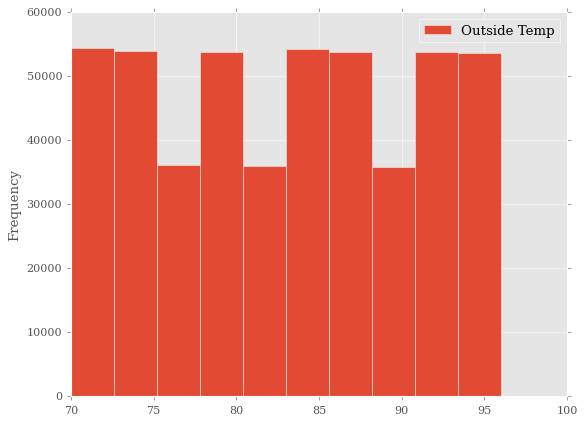

In [42]:
#27 Plot A
plot_a = df[['Outside Temp']].plot.hist();

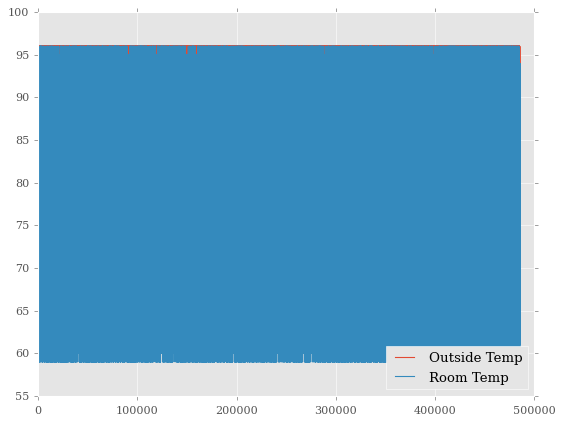

In [43]:
#Plot B 
plot_b = df[['Outside Temp', 'Room Temp']].plot();

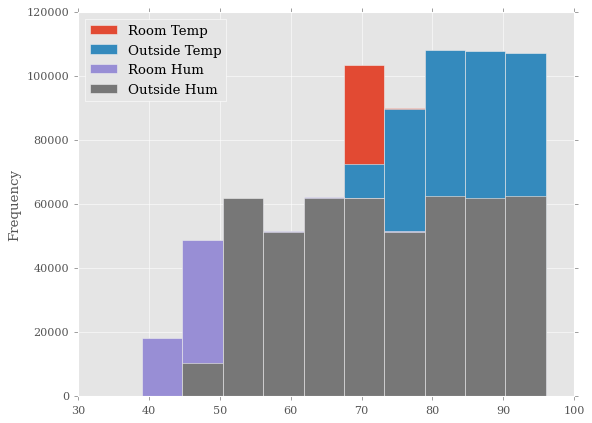

In [44]:
#Plot C
plot_c = df[['Room Temp', 'Outside Temp', 'Room Hum', "Outside Hum"]].plot.hist();